In [1]:
import gym
import pygame
from examples.blackjack import Blackjack
from algorithms.planner import Planner
from algorithms.rl import RL
import numpy as np
from examples.test_env import TestEnv

import seaborn as sns
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


# 1 - Blackjack - convergence plot

In [2]:


def testBlackjackVI(pol,iters=2000):
    test_scores = TestEnv.test_env(env=blackjack.env,n_iters=iters, render=False, pi=pol, user_input=False,
                                   convert_state_obs=blackjack.convert_state_obs)
    
    print(np.mean(test_scores))
    return np.mean(test_scores)





def plotConvergencePlot(V_track,title):
    avg= np.mean(V_track,axis=1)
    max = np.max(V_track,axis=1)
    std = np.std(V_track,axis=1)
    #calculate V[n]-V[n-1] for each n in array called diff

    differences = V_track[1:,:] - V_track[:-1,:]



    #sum the absolute values of the differences
    diffSums = np.sum(np.abs(differences),axis=1)


    #plot the 3 on a graph
    import matplotlib.pyplot as plt
    plt.plot(avg)
    plt.plot(max)
    plt.plot(std)
    plt.plot(diffSums/100)
    plt.title(title)
    #legend
    plt.legend(['Average','Max','Std','Sum of abs differences/100'])
    plt.xlim(-2,20)
    plt.show()



ITERATING
runtime = 0.00 seconds


/home/bpopper/gtCode/bettermdptools/bettermdptools/algorithms/planner.py:77: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")
/home/bpopper/miniconda3/envs/assignementMDP/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


-0.05404


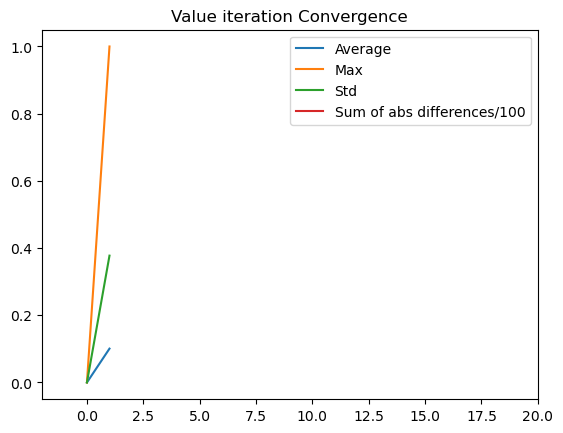

In [3]:
# Let's use value iteration

blackjack = Blackjack()

V_I, V_track_I, pi_I = Planner(blackjack.P).value_iteration(n_iters=2,gamma=0.95,theta=1e-12)

testBlackjackVI(pi_I,50000)
plotConvergencePlot(V_track_I,'Value iteration Convergence')

#runtime is 0.09 so 6e-3 sec / iter



runtime = 0.03 seconds


-0.04552


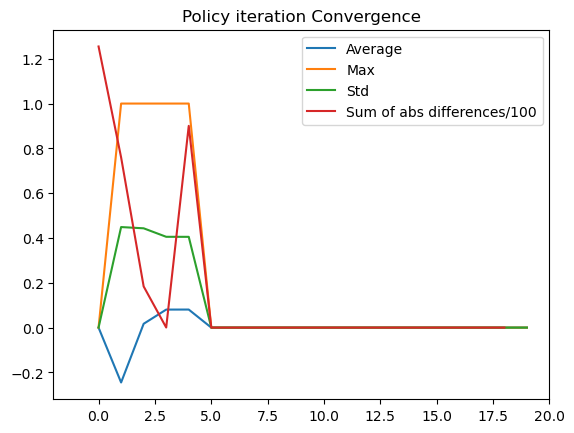

In [4]:
# the same for policy iteration
blackjack = Blackjack()

V_P, V_track_P, pi_P = Planner(blackjack.P).policy_iteration(n_iters=20,gamma=0.95,theta=1e-12)

testBlackjackVI(pi_P,50000)
plotConvergencePlot(V_track_P,'Policy iteration Convergence')

#runtime is 0.19 so 4e-2 sec / iter

In [5]:
def displayPoliciy(arrayActions,title):

    #reshape as 29x10
    arrayActions=np.reshape(arrayActions,(29,10))





    plt.figure(figsize=(14,10))

    axis_x_labels = ['H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'BJ']
    axis_y_labels = ['2', '3', '4', '5', '6', '7', '8', '9', 'T', 'A']

    sns.heatmap(arrayActions, cmap='RdYlGn_r', linewidths=0.5, xticklabels=axis_x_labels, yticklabels=axis_y_labels, fmt='g',cbar=False)


    plt.yticks(np.arange(len(axis_x_labels)) + 0.5, axis_x_labels, rotation=45)
    plt.xticks(np.arange(len(axis_y_labels)) + 0.5, axis_y_labels, rotation='horizontal')
    plt.title(title)
    # Show the plot
    plt.show()

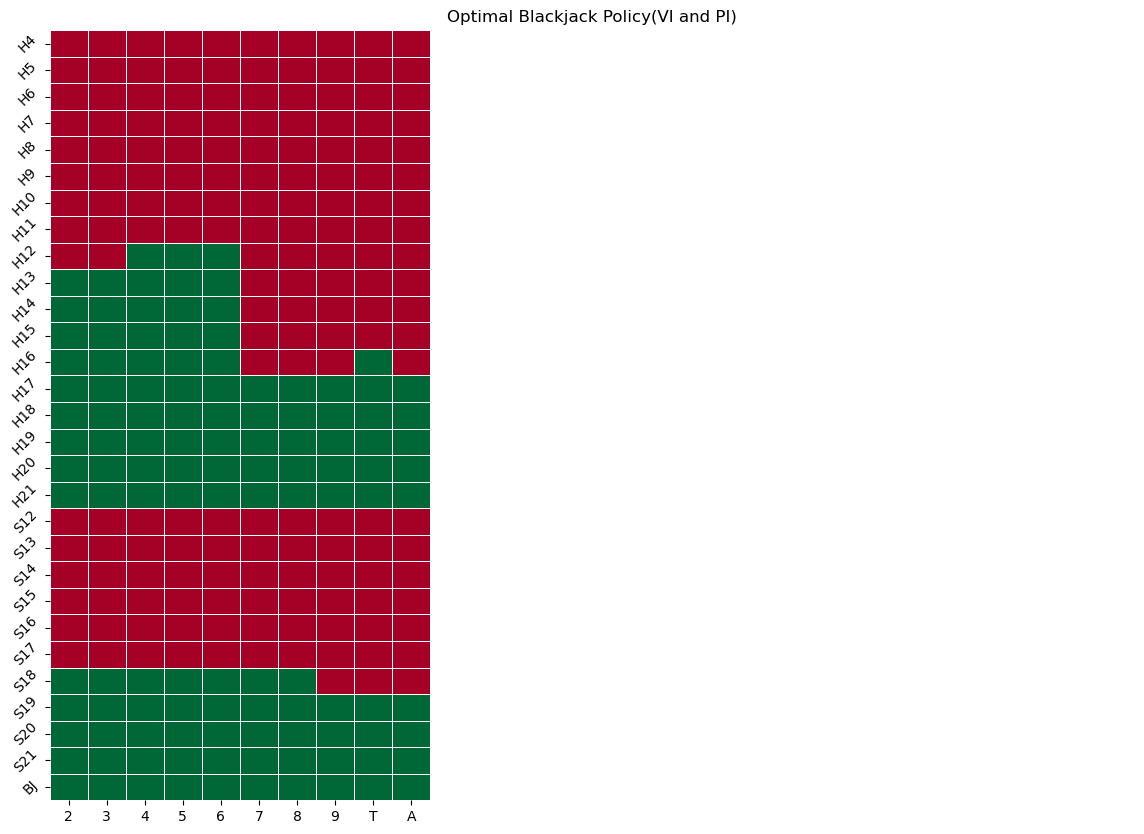

In [6]:
#display policy pi

array_pi_I = np.array([pi_I[s] for s in range(290)])
displayPoliciy(array_pi_I,'Optimal Blackjack Policy(VI and PI)')



ITERATING
ITERATING
ITERATING
ITERATING
ITERATING
ITERATING
ITERATING
ITERATING
ITERATING
ITERATING
ITERATING
ITERATING
ITERATING
runtime = 0.02 seconds
-0.045


/home/bpopper/miniconda3/envs/assignementMDP/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


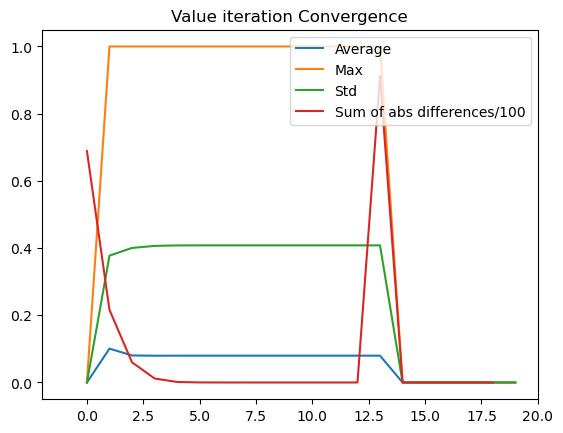

In [14]:
# Let's use value iteration

blackjack = Blackjack()

V_I, V_track_I, pi_II = Planner(blackjack.P).value_iteration(n_iters=20,gamma=0.999,theta=1e-12)

testBlackjackVI(pi_I,1000)
plotConvergencePlot(V_track_I,'Value iteration Convergence')

#runtime is 0.09 so 6e-3 sec / iter



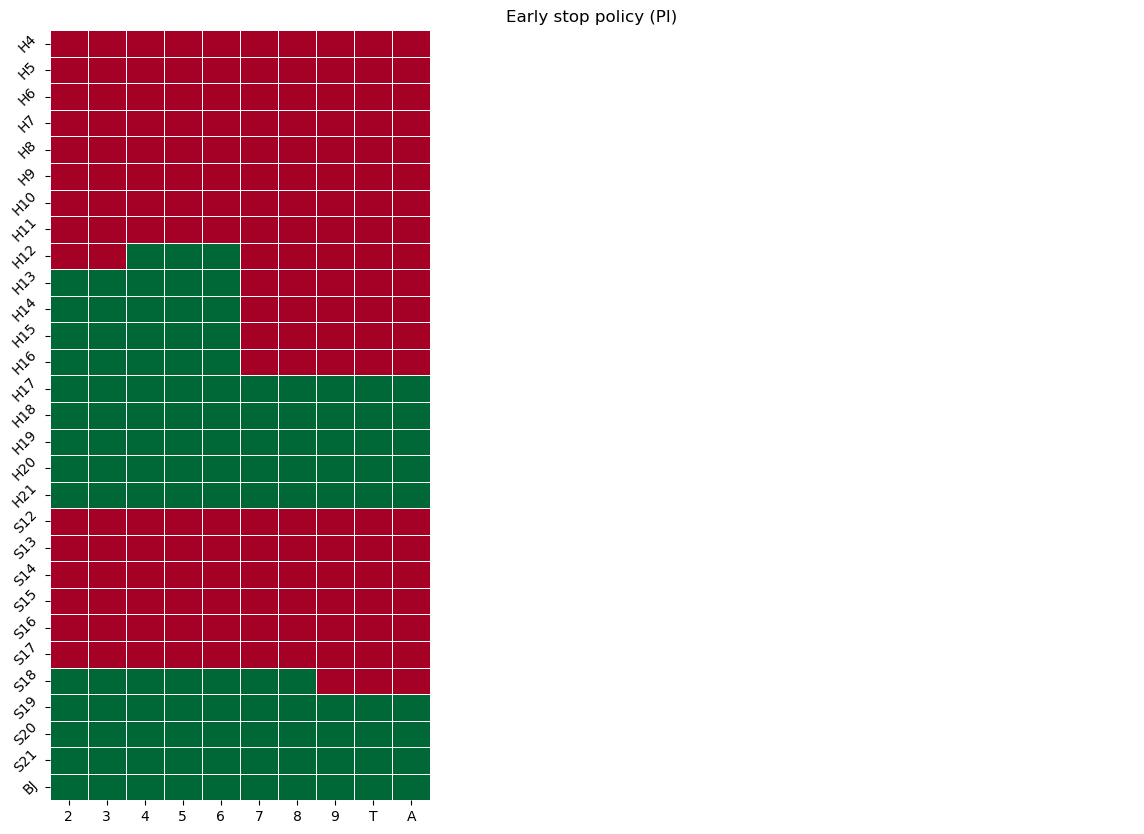

In [15]:
#display policy after early sotp
array_pi_I = np.array([pi_II[s] for s in range(290)])
displayPoliciy(array_pi_I,'Early stop policy (PI)')

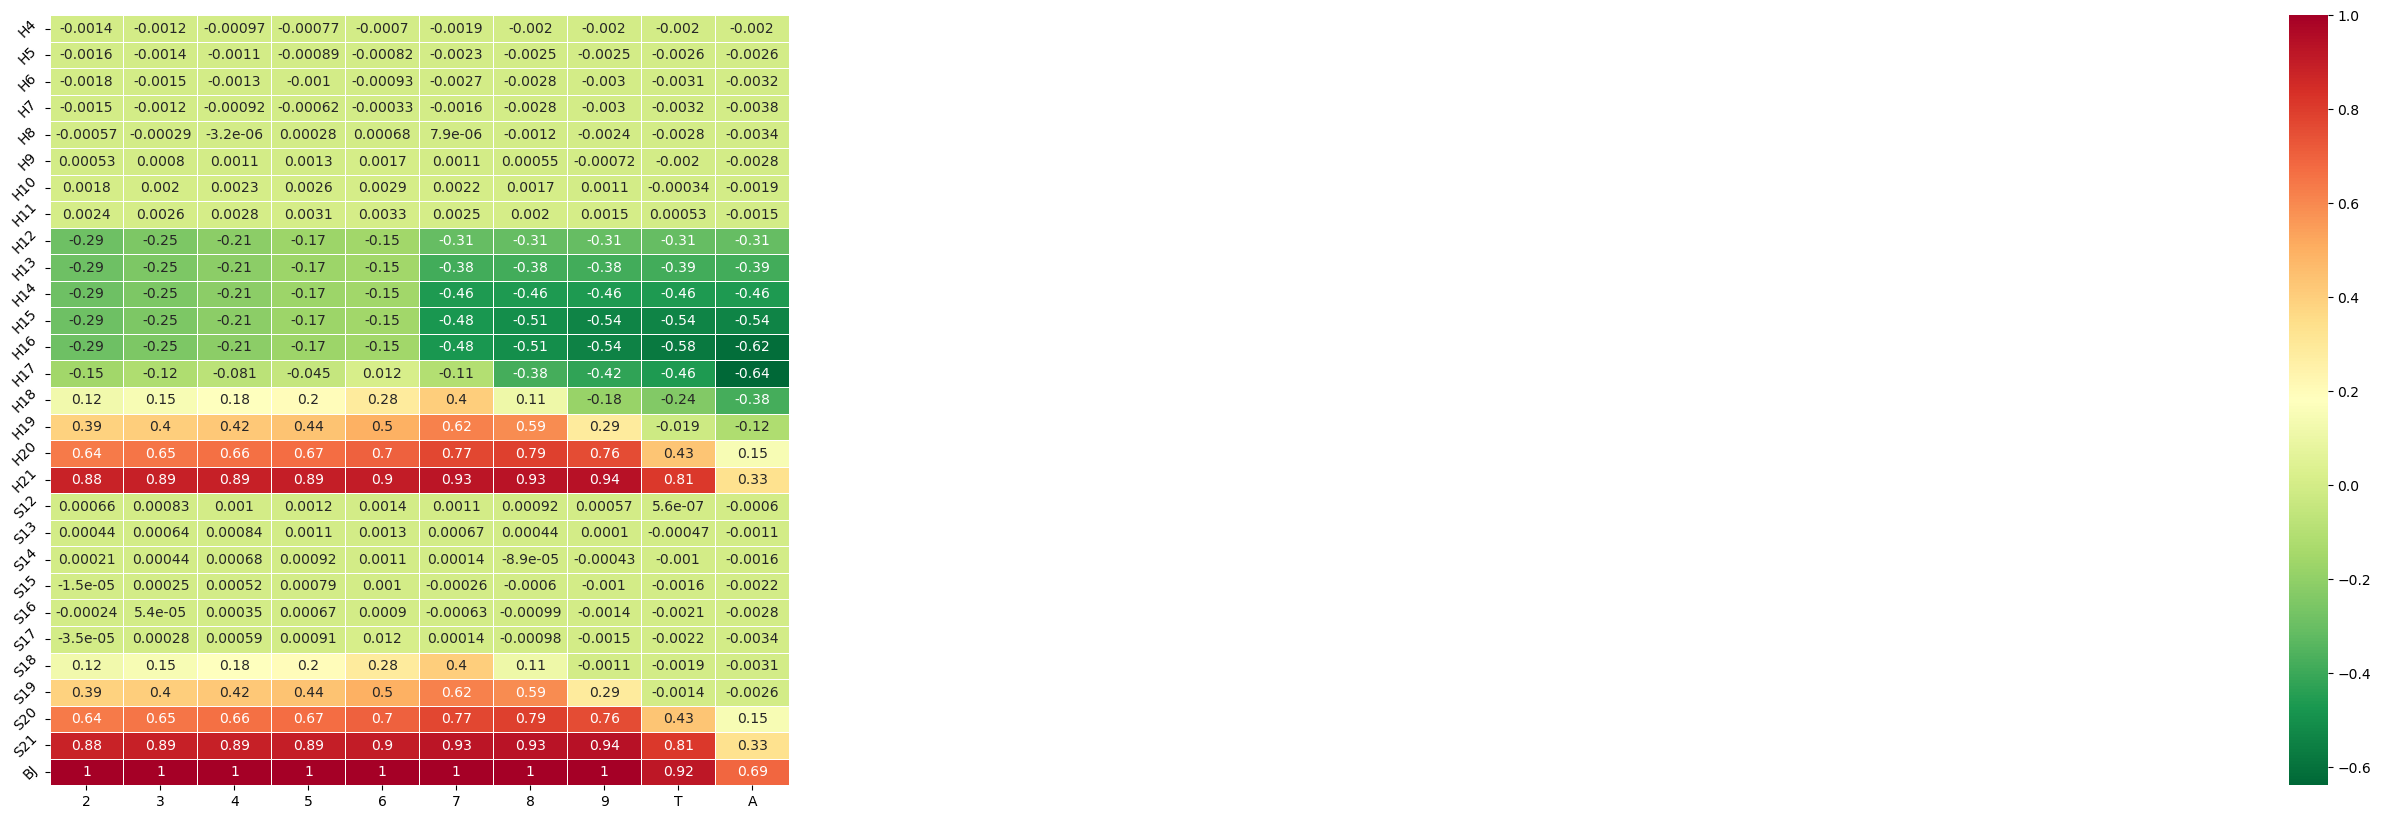

In [9]:
def displayV(V):

    #reshape as 29x10
    arrayActions=np.reshape(V,(29,10))





    plt.figure(figsize=(34,10))

    axis_x_labels = ['H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'BJ']
    axis_y_labels = ['2', '3', '4', '5', '6', '7', '8', '9', 'T', 'A']

    sns.heatmap(arrayActions, cmap='RdYlGn_r', annot=True,linewidths=0.5, xticklabels=axis_x_labels, yticklabels=axis_y_labels, fmt='.2g')


    plt.yticks(np.arange(len(axis_x_labels)) + 0.5, axis_x_labels, rotation=45)
    plt.xticks(np.arange(len(axis_y_labels)) + 0.5, axis_y_labels, rotation='horizontal')

    # Show the plot
    plt.show()

displayV(V_I)

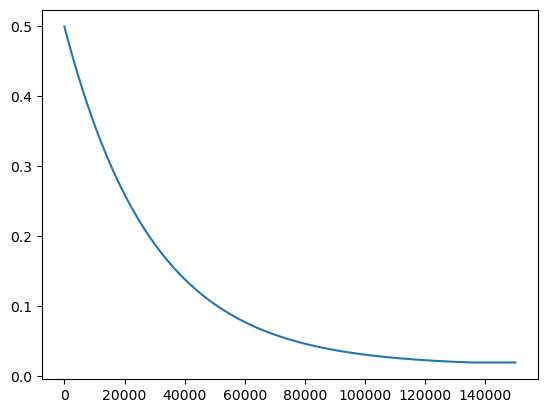

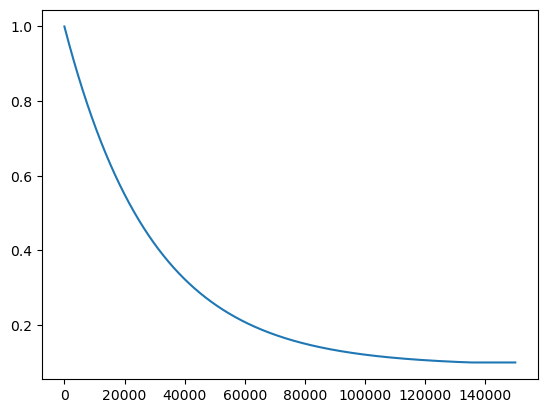

  0%|          | 0/150000 [00:00<?, ?it/s]/home/bpopper/miniconda3/envs/assignementMDP/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 0
First episode
Episode: 10000
Episode: 20000
Episode: 30000


 28%|██▊       | 41507/150000 [00:04<00:10, 10376.64it/s]

Episode: 40000
Episode: 50000
Episode: 60000
Episode: 70000
Episode: 80000


 55%|█████▌    | 83014/150000 [00:08<00:06, 10338.03it/s]

Episode: 90000
Episode: 100000
Episode: 110000
Episode: 120000


 83%|████████▎ | 124892/150000 [00:12<00:02, 10397.85it/s]

Episode: 130000
Episode: 140000


runtime = 14.80 seconds


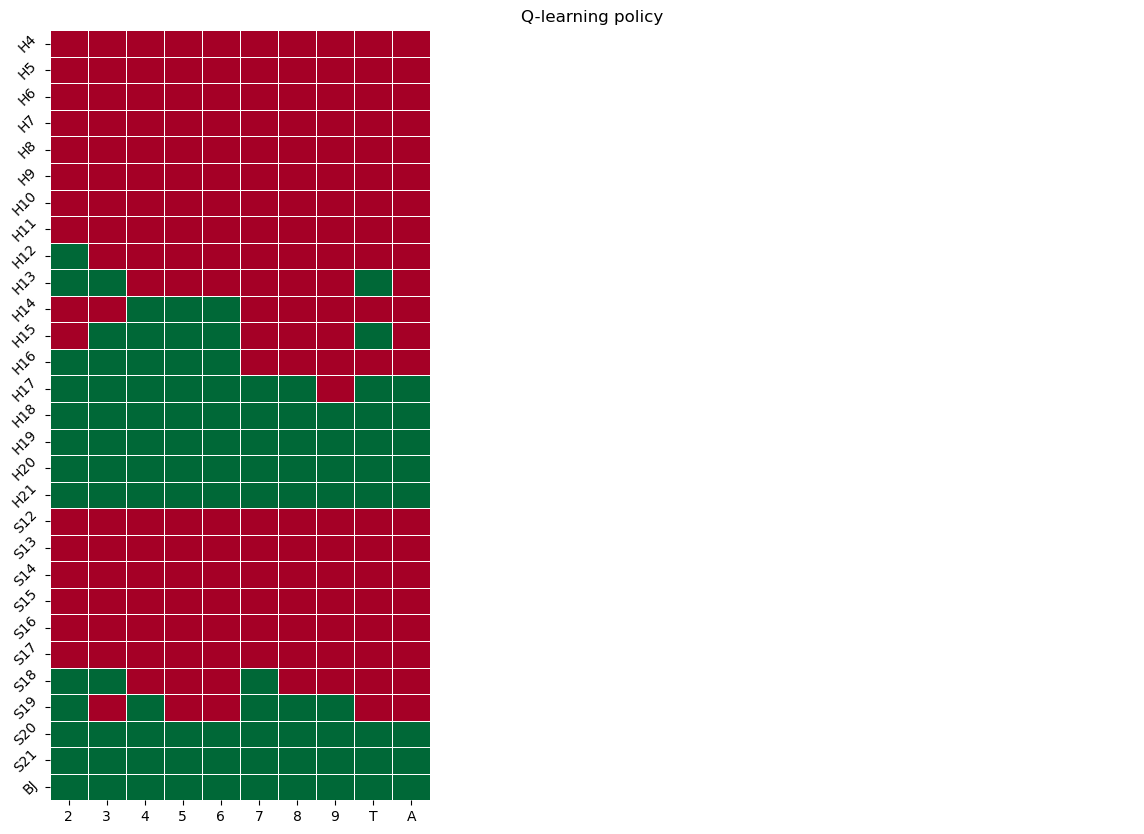

In [56]:
def compareToOptimalPol(opti,toTest):
        opti=np.array([opti[s] for s in range(290)])

        toTest=np.array([toTest[s] for s in range(290)])

        #calculate the difference
        diff=np.sum(np.abs(opti-toTest))
        return diff

  #                    nS=None,
#                    nA=None,
#                    convert_state_obs=lambda state, done: state,
#                    gamma=.99,
#                    init_alpha=0.5,
#                    min_alpha=0.01,
#                    alpha_decay_ratio=0.5,
#                    init_epsilon=1.0,
#                    min_epsilon=0.1,
#                    epsilon_decay_ratio=0.9,
#                    n_episodes=10000):
#       
      
blackjack = Blackjack()



Q, V, pi, Q_track, pi_track = RL(blackjack.env).q_learning(blackjack.n_states, blackjack.n_actions, blackjack.convert_state_obs,n_episodes=150000,min_alpha=0.02,alpha_decay_ratio=.9,epsilon_decay_ratio=.9,min_epsilon=0.04)

#display final policy
array_pi = np.array([pi[s] for s in range(290)])
displayPoliciy(array_pi,'Q-learning policy')


In [57]:
#compare to optimal policy

optimalPol=pi_I.copy()
compareToOptimalPol(optimalPol,pi)

23

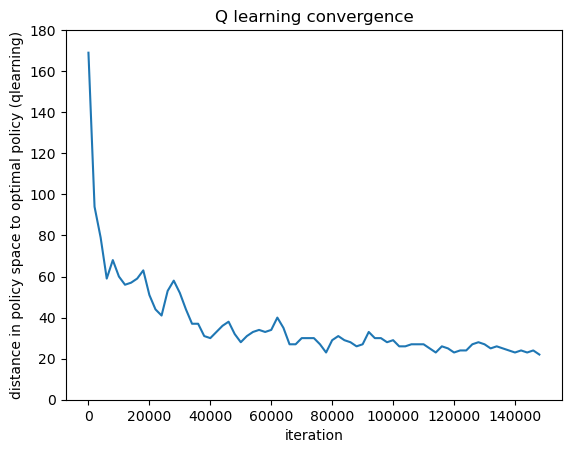

-0.1738
-0.1336
-0.1386
-0.1256
-0.131
-0.0944
-0.118
-0.0678
-0.0832
-0.1312
-0.0824
-0.0776
-0.09
-0.1012
-0.1038
-0.1028
-0.0644
-0.0776
-0.0412
-0.0664
-0.073
-0.0924
-0.054
-0.0756
-0.0498
-0.0584
-0.0674
-0.0824
-0.084
-0.073
-0.0548
-0.0706
-0.0568
-0.0702
-0.0678
-0.056
-0.0508
-0.077
-0.0612
-0.0536
-0.0556
-0.0772
-0.0674
-0.0668
-0.0814
-0.0566
-0.0628
-0.069
-0.0798
-0.0444
-0.096
-0.0516
-0.0712
-0.084
-0.054
-0.0614
-0.0414
-0.0712
-0.026
-0.0382
-0.0572
-0.0416
-0.0752
-0.0568
-0.0626
-0.0738
-0.0646
-0.065
-0.0382
-0.066
-0.0582
-0.0446
-0.0652
-0.0714
-0.0562


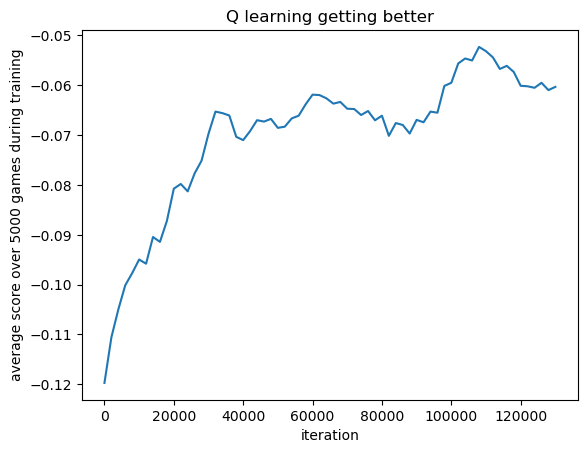

In [62]:
#test iter 0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000,90000, with pi_track against optimal policy, plot 

distanceToOptimal = []

for i in range(0,150000,2000):
    distanceToOptimal.append(compareToOptimalPol(optimalPol,pi_track[i]))

plt.plot(range(0,150000,2000),distanceToOptimal)

plt.xlabel('iteration')
plt.ylabel('distance in policy space to optimal policy (qlearning)')
plt.title('Q learning convergence')
plt.ylim(0,180)
plt.show()


#test the policies with the same for loop

scores=[]
for i in range(0,150000,2000):
    scores.append(testBlackjackVI(pi_track[i],5000))

#apply moving average of size 5
def moving_average(a, n=5):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n-1:] / n

scores=moving_average(scores,10)
plt.plot(range(0,132000,2000),scores)
plt.xlabel('iteration')
plt.ylabel('average score over 5000 games during training')
plt.title('Q learning getting better')
plt.show()
    

    
